In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']

## 檢視、整理原始資料

### 1. 顧客資料

In [2]:
transactions = pd.read_csv("交易記錄檔.csv", encoding="big5")
customers = pd.read_csv("客戶資料檔.csv")
products = pd.read_csv("產品資料檔.csv")

In [3]:
customers.head()

,客戶ID,Gender,Age,Zipcode,Area
0,3596,男,37,247,北區
1,1729,女,29,112,北區
2,2036,男,30,237,北區
3,1686,男,34,234,北區
4,5943,女,48,802,南區


In [4]:
customers.describe()

,客戶ID,Age,Zipcode
count,200.000000,200.000000,200.000000
mean,4112.910000,42.550000,419.180000
std,2400.550205,13.316688,246.604739
min,62.000000,1.000000,103.000000
25%,2100.500000,34.000000,236.750000
50%,3870.500000,40.000000,330.000000
75%,6147.750000,50.000000,619.250000
max,8202.000000,108.000000,973.000000


In [5]:
def classify_age(age):
    if age < 25:
        return "未滿25歲"
    elif age < 35:
        return "25-34歲"
    elif age < 45:
        return "35-44歲"
    elif age < 55:
        return "45-54歲"
    elif age < 65:
        return "55-64歲"
    else:
        return "65歲以上"

customers['AgeLevel'] = customers.apply(lambda x: classify_age(x['Age']), axis=1)
customers.head()

,客戶ID,Gender,Age,Zipcode,Area,AgeLevel
0,3596,男,37,247,北區,35-44歲
1,1729,女,29,112,北區,25-34歲
2,2036,男,30,237,北區,25-34歲
3,1686,男,34,234,北區,25-34歲
4,5943,女,48,802,南區,45-54歲


### 2.交易資料

In [6]:
transactions.head()

,交易編號,Date,ID,Product_ID,Quantity,Amount
0,86,20060101,92,2842,1,45
1,124,20060102,198,67438,1,599
2,273,20060104,338,68431,1,1990
3,273,20060104,338,68431,1,2499
4,273,20060104,338,68431,3,7497


### 3.產品資料

In [7]:
products.head()

,Product_ID,Product,Category_ID,Category
0,2760,國際黑1號池,40301,一般電池
1,2761,國際黑2號池,40301,一般電池
2,2762,國際黑3號池,40301,一般電池
3,2766,勁量鹼性電池1號2入,40302,鹼性電池
4,2772,勁量鹼性電池9V1入,40302,鹼性電池


In [8]:
transactions = transactions.merge(products[['Product_ID', 'Category']], on='Product_ID' )
transactions

,交易編號,Date,ID,Product_ID,Quantity,Amount,Category
0,86,20060101,92,2842,1,45,一般電池
1,851,20060111,284,2842,1,45,一般電池
2,9317,20060427,332,2842,1,45,一般電池
3,28714,20061122,4922,2842,1,45,一般電池
4,124,20060102,198,67438,1,599,DVD燒錄片
...,...,...,...,...,...,...,...
3072,81578,20071228,646,2860,1,135,鹼性電池
3073,81671,20071229,2220,84418,1,599,數位MP3隨身聽
3074,81671,20071229,2220,78240,1,199,耳機麥克風
3075,81690,20071229,2778,83033,1,199,鍵盤


## 製作購買紀錄矩陣
### 1.樞紐分析
計算每個人購買過的產品與數量

In [9]:
# Example
transactions.head(10)

,交易編號,Date,ID,Product_ID,Quantity,Amount,Category
0,86,20060101,92,2842,1,45,一般電池
1,851,20060111,284,2842,1,45,一般電池
2,9317,20060427,332,2842,1,45,一般電池
3,28714,20061122,4922,2842,1,45,一般電池
4,124,20060102,198,67438,1,599,DVD燒錄片
5,273,20060104,338,68431,1,1990,DVD光碟機
6,273,20060104,338,68431,1,2499,DVD光碟機
7,273,20060104,338,68431,3,7497,DVD光碟機
8,781,20060110,977,68431,1,2990,DVD光碟機
9,361,20060105,527,26952,1,90,網路線材


In [10]:
# Example
pd.pivot_table(transactions.head(10), values=['Quantity'], columns=['Category'], index=['ID'], aggfunc=np.sum, fill_value=0)

Quantity                 
Category   DVD光碟機 DVD燒錄片 一般電池 網路線材
ID                                
92              0      0    1    0
198             0      1    0    0
284             0      0    1    0
332             0      0    1    0
338             5      0    0    0
527             0      0    0    1
977             1      0    0    0
4922            0      0    1    0

In [11]:
pivot_tab = pd.pivot_table(transactions, values=['Quantity'], columns=['Category'], index=['ID'],  aggfunc=np.sum, fill_value=0)
pivot_tab

Quantity                                                         \
Category 30公升以下微電腦微波爐 CD燒錄片 DVD 燒錄器 DVD光碟機 DVD燒錄片 EPSON墨水 HP墨水 LCD螢幕 MP3\MP4   
ID                                                                             
62                  0     5       1      0      0       0    0     0       0   
87                  0     0       0      0      0       1    0     0       3   
92                  1     0       0      0      0       0    0     0       0   
139                 0     4       0      0      1       0    0     2       0   
198                 0     3       1      0      6       1    3     1       0   
...               ...   ...     ...    ...    ...     ...  ...   ...     ...   
8006                0     0       0      0      0       0    0     0       0   
8059                1     0       0      0      0       0    0     0       0   
8141                0     0       0      0      0       0    0     0       0   
8192                1     0       0      0      0       0    2     0       0   
8202                0     0       0      0      0       0    0     0       0   

                  ...                                                     
Category USB 儲存碟  ... 有線光學鼠 省電燈泡 筆記型電腦 網路線材 線材 耳機麥克風 記憶卡 讀卡機/轉接卡 鍵盤 鹼性電池  
ID                ...                                                     
62             1  ...     1    0     0    0  0     0   1       0  2    2  
87             2  ...     0    0     1    0  0     0   0       0  0    2  
92             3  ...     3    4     1    0  0     0   1       2  0    1  
139            2  ...     0    0     0    4  0     0   1       1  0    1  
198            2  ...     0    0     0    2  3     3   0       0  0    0  
...          ...  ...   ...  ...   ...  ... ..   ...  ..     ... ..  ...  
8006           0  ...     0    0     0    0  0     0   0       0  0    0  
8059           0  ...     0    0     0    0  0     0   0       0  0    0  
8141           0  ...     0    0     0    0  0     0   0       0  0    0  
8192           0  ...     0    0     0    0  0     0   0       0  0    0  
8202           0  ...     0    0     0    0  0     0   0       0  0    0  

[200 rows x 30 columns]

### 2. 計算購買紀錄矩陣
有買過的東西紀錄1，否則則記錄0

In [12]:
purchase_matrix = (pivot_tab>0)*1
purchase_matrix

Quantity                                                         \
Category 30公升以下微電腦微波爐 CD燒錄片 DVD 燒錄器 DVD光碟機 DVD燒錄片 EPSON墨水 HP墨水 LCD螢幕 MP3\MP4   
ID                                                                             
62                  0     1       1      0      0       0    0     0       0   
87                  0     0       0      0      0       1    0     0       1   
92                  1     0       0      0      0       0    0     0       0   
139                 0     1       0      0      1       0    0     1       0   
198                 0     1       1      0      1       1    1     1       0   
...               ...   ...     ...    ...    ...     ...  ...   ...     ...   
8006                0     0       0      0      0       0    0     0       0   
8059                1     0       0      0      0       0    0     0       0   
8141                0     0       0      0      0       0    0     0       0   
8192                1     0       0      0      0       0    1     0       0   
8202                0     0       0      0      0       0    0     0       0   

                  ...                                                     
Category USB 儲存碟  ... 有線光學鼠 省電燈泡 筆記型電腦 網路線材 線材 耳機麥克風 記憶卡 讀卡機/轉接卡 鍵盤 鹼性電池  
ID                ...                                                     
62             1  ...     1    0     0    0  0     0   1       0  1    1  
87             1  ...     0    0     1    0  0     0   0       0  0    1  
92             1  ...     1    1     1    0  0     0   1       1  0    1  
139            1  ...     0    0     0    1  0     0   1       1  0    1  
198            1  ...     0    0     0    1  1     1   0       0  0    0  
...          ...  ...   ...  ...   ...  ... ..   ...  ..     ... ..  ...  
8006           0  ...     0    0     0    0  0     0   0       0  0    0  
8059           0  ...     0    0     0    0  0     0   0       0  0    0  
8141           0  ...     0    0     0    0  0     0   0       0  0    0  
8192           0  ...     0    0     0    0  0     0   0       0  0    0  
8202           0  ...     0    0     0    0  0     0   0       0  0    0  

[200 rows x 30 columns]

## 因素分析

In [13]:
from factor_analyzer import FactorAnalyzer, Rotator

### 1. 找出有幾個特徵值 > 1 
這個數量就是因子數量。印出特徵值之後發現有10個特徵值 > 1，取因子個數=10。

In [14]:
fa = FactorAnalyzer()
fa.fit(purchase_matrix)
eigenvalues, vectors = fa.get_eigenvalues()
eigenvalues

array([6.48274594, 1.84425848, 1.57024934, 1.47658162, 1.36157042,
       1.29925416, 1.23250194, 1.11575978, 1.08433408, 1.0069649 ,
       0.97078146, 0.92652903, 0.8732597 , 0.83188412, 0.77743094,
       0.74716756, 0.69546631, 0.65711202, 0.61929998, 0.57488435,
       0.53943981, 0.51790947, 0.49300941, 0.42972734, 0.4059111 ,
       0.37639693, 0.36465281, 0.33457375, 0.28769516, 0.10264808])

### 2. 因素分析
從前一步知道要取n_factor=10。

In [15]:
fa = FactorAnalyzer(n_factors=10, method='principal')
fa.fit(purchase_matrix)
loadings = fa.loadings_
pd.DataFrame(loadings, index=purchase_matrix.columns.droplevel(None))

,0,1,2,3,4,5,6,7,8,9
Category,,,,,,,,,,
30公升以下微電腦微波爐,-0.029833,0.072707,-0.093339,0.031323,0.023307,0.258539,-0.022065,0.157009,0.842758,0.200427
CD燒錄片,0.042809,-0.021997,0.072338,0.062366,0.671000,0.253690,0.013643,-0.005397,0.219744,-0.124324
DVD 燒錄器,0.019290,0.058284,0.410779,0.013522,0.385612,-0.101177,0.064843,0.043583,-0.088916,0.009885
DVD光碟機,-0.151484,-0.054612,-0.101844,0.259217,-0.089633,0.256317,0.166378,-0.068700,0.116557,0.826747
DVD燒錄片,0.021941,0.029756,-0.011830,-0.021364,0.714810,0.188173,0.095172,0.084847,-0.017569,0.125888
EPSON墨水,-0.008929,0.020163,-0.103431,0.038423,0.215475,0.714239,-0.019845,0.117862,0.186732,-0.014405
HP墨水,-0.401779,-0.121760,-0.057413,-0.057305,0.010643,0.033543,0.240363,0.204773,-0.421978,-0.159030
LCD螢幕,-0.100608,0.389448,-0.091984,0.097533,0.329150,0.049660,0.055603,-0.179750,-0.146809,-0.119336
MP3\MP4,-0.275308,-0.041238,0.031485,-0.171417,0.131457,0.616648,-0.010687,0.011227,0.027643,0.246376


將因素負荷量視覺化，左邊為取絕對值的版本，用來判斷數值大小，一般而言我們只選0.4以上的作為購物籃所包含的商品。
右邊的圖則幫助我們判斷符號方向。

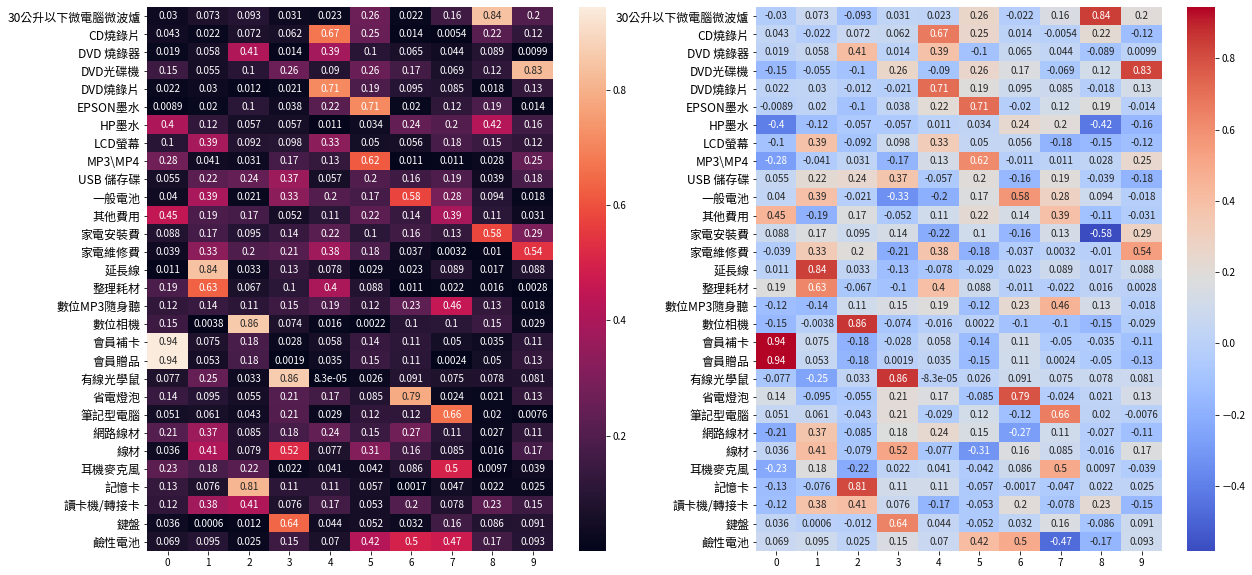

In [16]:
df_fa_viz = pd.DataFrame(loadings, index=list(purchase_matrix.columns.droplevel(None)))
df_fa_viz_abs = pd.DataFrame(np.abs(loadings), index=list(purchase_matrix.columns.droplevel(None)))

fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(1, 2, 1)
sns.heatmap(df_fa_viz_abs, annot=True, cmap="rocket", ax=ax1)
ax1.yaxis.set_tick_params(labelsize=12)


ax2 = fig.add_subplot(1, 2, 2)
sns.heatmap(df_fa_viz, annot=True, cmap="coolwarm", ax=ax2)
ax2.yaxis.set_tick_params(labelsize=12)

###  3. 因素轉軸
轉軸後負荷量的數值會更趨向1, -1, 或 0, 解釋上更為容易。

In [17]:
rotator = Rotator(method='varimax')
rot_loadings = rotator.fit_transform(loadings)
pd.DataFrame(rot_loadings, index=purchase_matrix.columns.droplevel(None))

,0,1,2,3,4,5,6,7,8,9
Category,,,,,,,,,,
30公升以下微電腦微波爐,-0.060251,0.058299,-0.108264,0.041584,0.004428,0.314069,-0.008320,0.182350,0.824480,0.163030
CD燒錄片,0.053290,0.009832,0.094614,0.033760,0.682786,0.229822,0.004577,0.011328,0.221123,-0.094388
DVD 燒錄器,0.049473,0.058049,0.429845,0.008865,0.358464,-0.094666,0.046086,0.058555,-0.081656,0.073427
DVD光碟機,-0.208758,-0.090759,-0.136777,0.333103,-0.125808,0.331154,0.236524,-0.100614,0.115397,0.721366
DVD燒錄片,0.046380,0.051642,0.007812,-0.015683,0.702474,0.188643,0.086041,0.093619,-0.020326,0.173141
EPSON墨水,-0.006560,0.050556,-0.114238,0.037310,0.239819,0.711852,-0.013961,0.069960,0.161964,-0.077331
HP墨水,-0.345387,-0.092427,-0.038089,-0.067459,0.038219,0.018051,0.213481,0.246268,-0.463872,-0.173524
LCD螢幕,-0.098815,0.416262,-0.063083,0.074366,0.342007,-0.010215,0.051178,-0.155241,-0.131869,-0.089649
MP3\MP4,-0.280447,-0.028164,0.013592,-0.152997,0.134389,0.639267,0.018942,-0.015415,-0.003637,0.191685


將轉軸後的結果視覺化。大抵跟沒有進行因素轉軸後的結果差不多。

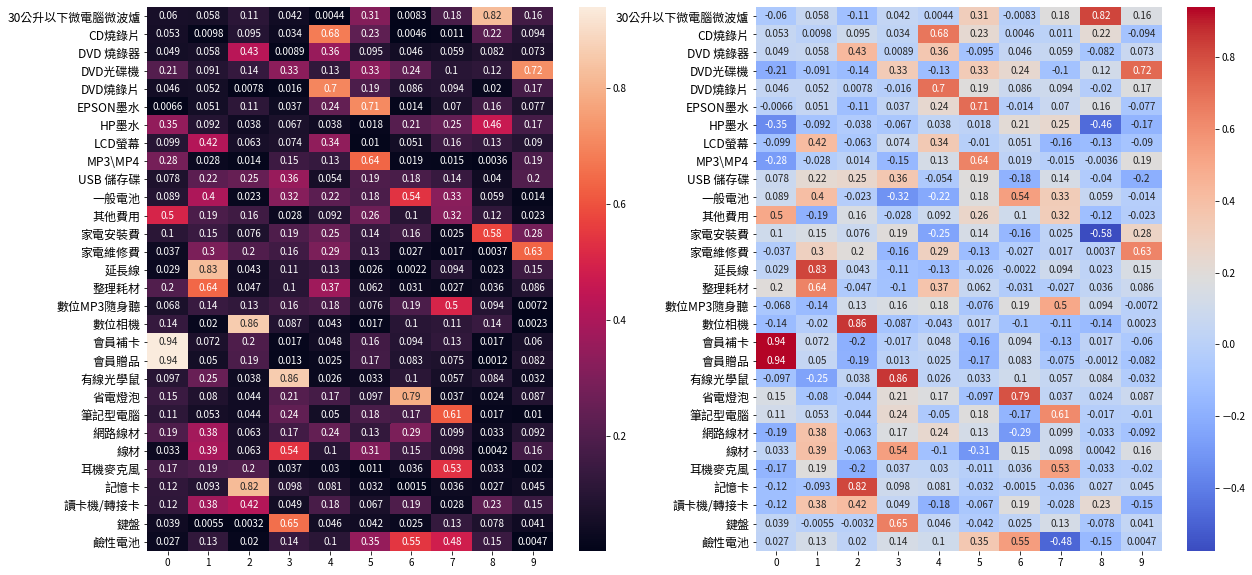

In [18]:
df_fa_viz = pd.DataFrame(rot_loadings, index=list(purchase_matrix.columns.droplevel(None)))
df_fa_viz_abs = pd.DataFrame(np.abs(rot_loadings), index=list(purchase_matrix.columns.droplevel(None)))

fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(1, 2, 1)
sns.heatmap(df_fa_viz_abs, annot=True, cmap="rocket", ax=ax1)
ax1.yaxis.set_tick_params(labelsize=12)


ax2 = fig.add_subplot(1, 2, 2)
sns.heatmap(df_fa_viz, annot=True, cmap="coolwarm", ax=ax2)
ax2.yaxis.set_tick_params(labelsize=12)

### 購物籃分析結果

1. 會員補卡、會員贈品、其他費用
2. 延長線、整理耗材、線材
3. DVD燒錄器、數位相機、記憶卡、讀卡機/轉接卡
4. 有線光學鼠、線材、鍵盤
5. CD燒錄片、DVD燒錄片、整理耗材
6. EPSON墨水、MP3/MP4、鹼性電池
7. 一般電池、省電燈泡、鹼性電池
8. 數位MP3隨身聽、筆記型電腦、耳機麥克風
9. 30公升以下微電腦微波爐
10. DVD光碟機、家電維修費

## 統計購物籃購買量

In [19]:
purchase_matrix.columns = purchase_matrix.columns.droplevel(None)

In [20]:
pm = purchase_matrix

### 1. 所有顧客
這邊列出在資料期間，每個購物籃的購買過的人數。

In [21]:
print("購物籃 1 購買量 =",  pm[(pm['會員補卡']==1) & (pm['會員贈品']==1) & (pm['其他費用']==1)].count()[0])
print("購物籃 2 購買量 =",  pm[(pm['延長線']==1) & (pm['整理耗材']==1) & (pm['線材']==1)].count()[0])
print("購物籃 3 購買量 =",  pm[(pm['DVD 燒錄器']==1) & (pm['數位相機']==1) & (pm['記憶卡']==1) & (pm['讀卡機/轉接卡']==1)].count()[0])
print("購物籃 4 購買量 =",  pm[(pm['有線光學鼠']==1) & (pm['線材']==1) & (pm['鍵盤']==1)].count()[0])
print("購物籃 5 購買量 =",  pm[(pm['CD燒錄片']==1) & (pm['DVD燒錄片']==1) & (pm['整理耗材']==1)].count()[0])
print("購物籃 6 購買量 =",  pm[(pm['EPSON墨水']==1) & (pm['MP3\MP4']==1) & (pm['鹼性電池']==1)].count()[0])
print("購物籃 7 購買量 =",  pm[(pm['一般電池']==1) & (pm['省電燈泡']==1) & (pm['鹼性電池']==1)].count()[0])
print("購物籃 8 購買量 =",  pm[(pm['數位MP3隨身聽']==1) & (pm['筆記型電腦']==1) & (pm['耳機麥克風']==1)].count()[0])
print("購物籃 9 購買量 =",  pm[pm['30公升以下微電腦微波爐']==1].count()[0])
print("購物籃 10 購買量 =",  pm[(pm['DVD光碟機']==1) & (pm['家電維修費']==1)].count()[0])

購物籃 1 購買量 = 31
購物籃 2 購買量 = 12
購物籃 3 購買量 = 8
購物籃 4 購買量 = 19
購物籃 5 購買量 = 18
購物籃 6 購買量 = 12
購物籃 7 購買量 = 7
購物籃 8 購買量 = 8
購物籃 9 購買量 = 103
購物籃 10 購買量 = 23


### 2. 潛在流失顧客
製作流失高價值客戶資料，相對應的客戶編號`ivc_id`是直接從另一份notebook中複製貼上得來。

In [22]:
ivc_id = np.array([ 284,  332,  527,  539,  637,  655,  805,  915,  977, 1006,\
                1096, 1118, 1121, 1246, 1479, 1679, 1944, 1982, 2122, 2205,\
                2220, 2239, 2307, 2377, 2549, 2747, 2787, 2800, 2814, 2843,\
                2942, 2956, 2995, 3056, 3233, 3429, 3529, 3558, 3610, 3794,\
                3855, 4515, 4608, 4687, 4785, 4866, 4922, 4967, 5239, 5348,\
                5521, 5697, 5705, 5899, 5918, 5943, 6189, 6449, 6619, 6820,\
                7005, 7854])

ivc = pm.loc[ivc_id, :]
ivc.shape                # 印出資料維度,確認想要的資料有提取出來

(62, 30)

這邊列出在資料期間，每個購物籃的購買過的流失顧客人數。

In [23]:
print("購物籃 1 購買量 =",  ivc[(ivc['會員補卡']==1) & (ivc['會員贈品']==1) & (ivc['其他費用']==1)].count()[0])
print("購物籃 2 購買量 =",  ivc[(ivc['延長線']==1) & (ivc['整理耗材']==1) & (ivc['線材']==1)].count()[0])
print("購物籃 3 購買量 =",  ivc[(ivc['DVD 燒錄器']==1) & (ivc['數位相機']==1) & (ivc['記憶卡']==1) & (ivc['讀卡機/轉接卡']==1)].count()[0])
print("購物籃 4 購買量 =",  ivc[(ivc['有線光學鼠']==1) & (ivc['線材']==1) & (ivc['鍵盤']==1)].count()[0])
print("購物籃 5 購買量 =",  ivc[(ivc['CD燒錄片']==1) & (ivc['DVD燒錄片']==1) & (ivc['整理耗材']==1)].count()[0])
print("購物籃 6 購買量 =",  ivc[(ivc['EPSON墨水']==1) & (ivc['MP3\MP4']==1) & (ivc['鹼性電池']==1)].count()[0])
print("購物籃 7 購買量 =",  ivc[(ivc['一般電池']==1) & (ivc['省電燈泡']==1) & (ivc['鹼性電池']==1)].count()[0])
print("購物籃 8 購買量 =",  ivc[(ivc['數位MP3隨身聽']==1) & (ivc['筆記型電腦']==1) & (ivc['耳機麥克風']==1)].count()[0])
print("購物籃 9 購買量 =",  ivc[ivc['30公升以下微電腦微波爐']==1].count()[0])
print("購物籃 10 購買量 =",  ivc[(ivc['DVD光碟機']==1) & (ivc['家電維修費']==1)].count()[0])

購物籃 1 購買量 = 7
購物籃 2 購買量 = 5
購物籃 3 購買量 = 4
購物籃 4 購買量 = 8
購物籃 5 購買量 = 9
購物籃 6 購買量 = 5
購物籃 7 購買量 = 4
購物籃 8 購買量 = 5
購物籃 9 購買量 = 33
購物籃 10 購買量 = 9


### 漸流失顧客購物籃

In [86]:
pivot_tab_ivc = pd.pivot_table(transactions[transactions['ID'].isin(ivc_id)], values=['Quantity'], columns=['Category'], index=['ID'],  aggfunc=np.sum, fill_value=0)
purchase_matrix_ivc = (pivot_tab_ivc>0)*1

In [87]:
fa = FactorAnalyzer()
fa.fit(purchase_matrix_ivc)
eigenvalues, vectors = fa.get_eigenvalues()
eigenvalues

array([5.32178148, 2.68371327, 2.14273416, 1.91033804, 1.85116809,
       1.68111816, 1.39070364, 1.26257372, 1.21009135, 1.17545735,
       1.03011356, 1.01550129, 0.87302   , 0.79000588, 0.7544405 ,
       0.69934008, 0.59971224, 0.53016046, 0.51089191, 0.39691502,
       0.37965943, 0.33843508, 0.292514  , 0.27221061, 0.23059289,
       0.2123887 , 0.17296709, 0.12216129, 0.09491569, 0.05437503])

In [88]:
fa = FactorAnalyzer(n_factors=12, method='principal')
fa.fit(purchase_matrix_ivc)
loadings_ivc = fa.loadings_
pd.DataFrame(loadings_ivc, index=purchase_matrix_ivc.columns.droplevel(None))

,0,1,2,3,4,5,6,7,8,9,10,11
Category,,,,,,,,,,,,
30公升以下微電腦微波爐,0.087291,-0.091984,-0.006625,0.092557,-0.460268,0.819267,-0.114331,0.012484,0.027033,0.100537,-0.159613,0.296290
CD燒錄片,0.022400,0.117833,0.027453,-0.118750,0.066669,0.786993,0.350868,0.127667,-0.056401,-0.003622,0.238751,-0.145218
DVD 燒錄器,0.101437,0.447962,0.101462,0.012793,-0.111336,0.187096,0.191095,0.126388,0.262878,0.040266,0.107951,0.183984
DVD光碟機,-0.049200,-0.092076,-0.050874,-0.121429,0.071826,0.111263,-0.149175,0.138858,-0.098451,0.026154,0.133789,0.907428
DVD燒錄片,-0.085873,-0.092090,0.120859,0.074044,0.252156,0.015822,0.243843,-0.069258,0.059374,0.053479,0.757685,0.122966
EPSON墨水,-0.055024,-0.080091,0.045331,-0.033277,0.332611,0.403331,-0.308586,0.047979,-0.069921,0.525925,0.105885,0.029762
HP墨水,-0.134059,0.004928,0.675379,-0.046750,0.127294,-0.302863,0.019041,-0.181463,-0.023944,-0.093738,0.191165,0.137785
LCD螢幕,-0.051282,-0.052710,-0.070529,0.335100,0.218525,0.104571,0.988197,0.000427,-0.098852,-0.025283,0.192964,-0.147792
MP3\MP4,0.079227,-0.065875,-0.275158,-0.039293,0.138636,0.110603,0.081906,-0.082356,0.155405,0.985718,0.004890,0.103427


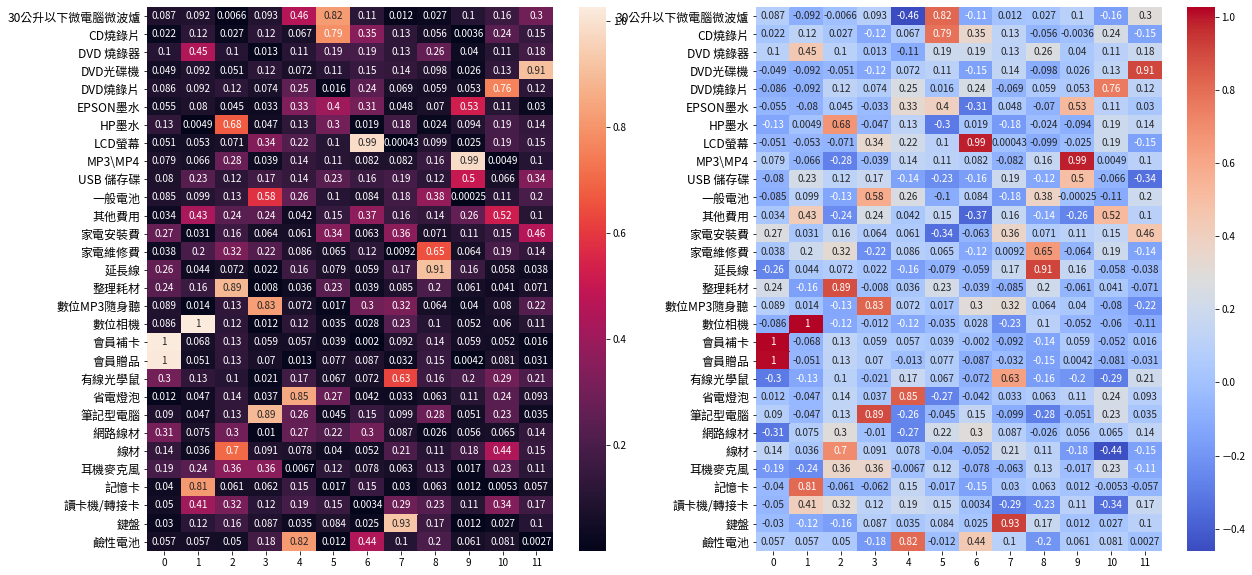

In [89]:
df_fa_viz = pd.DataFrame(loadings_ivc, index=list(purchase_matrix_ivc.columns.droplevel(None)))
df_fa_viz_abs = pd.DataFrame(np.abs(loadings_ivc), index=list(purchase_matrix_ivc.columns.droplevel(None)))

fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(1, 2, 1)
sns.heatmap(df_fa_viz_abs, annot=True, cmap="rocket", ax=ax1)
ax1.yaxis.set_tick_params(labelsize=12)


ax2 = fig.add_subplot(1, 2, 2)
sns.heatmap(df_fa_viz, annot=True, cmap="coolwarm", ax=ax2)
ax2.yaxis.set_tick_params(labelsize=12)

In [90]:
rotator = Rotator(method='varimax')
rot_loadings_ivc = rotator.fit_transform(loadings_ivc)
pd.DataFrame(rot_loadings_ivc, index=purchase_matrix_ivc.columns.droplevel(None))

,0,1,2,3,4,5,6,7,8,9,10,11
Category,,,,,,,,,,,,
30公升以下微電腦微波爐,0.122658,-0.013645,0.035116,0.022565,-0.826821,-0.037570,0.272729,0.119567,-0.035372,0.405917,0.014317,0.296894
CD燒錄片,0.071493,0.080493,0.006611,-0.105344,-0.092937,0.272744,0.781447,0.116849,0.017922,0.275434,0.164321,0.201193
DVD 燒錄器,0.069470,0.397290,0.024800,0.070786,-0.122292,-0.225265,0.343224,0.015825,0.286121,-0.015875,0.054497,0.020191
DVD光碟機,-0.110840,-0.033399,-0.061133,-0.119741,-0.071054,-0.765351,-0.031494,0.153497,-0.164635,0.249482,0.109552,0.436829
DVD燒錄片,-0.148519,-0.240944,0.112074,0.087682,0.406080,-0.249381,0.421307,-0.312470,0.101985,0.088371,0.367628,0.060624
EPSON墨水,0.002988,-0.034731,0.051793,-0.089475,0.083443,0.003628,0.029391,0.061866,-0.017892,0.799314,0.102392,-0.061189
HP墨水,-0.147682,-0.001295,0.660183,-0.098239,0.282413,-0.253896,-0.033309,-0.201935,-0.018001,-0.163912,-0.018908,-0.038328
LCD螢幕,-0.056094,-0.123293,-0.121899,0.505901,0.370833,0.140570,0.808414,-0.088190,-0.185722,-0.214823,-0.195842,0.025686
MP3\MP4,0.058657,-0.038324,-0.406251,0.087426,0.072116,-0.209573,0.109879,-0.256707,0.145028,0.774250,-0.360352,-0.290334


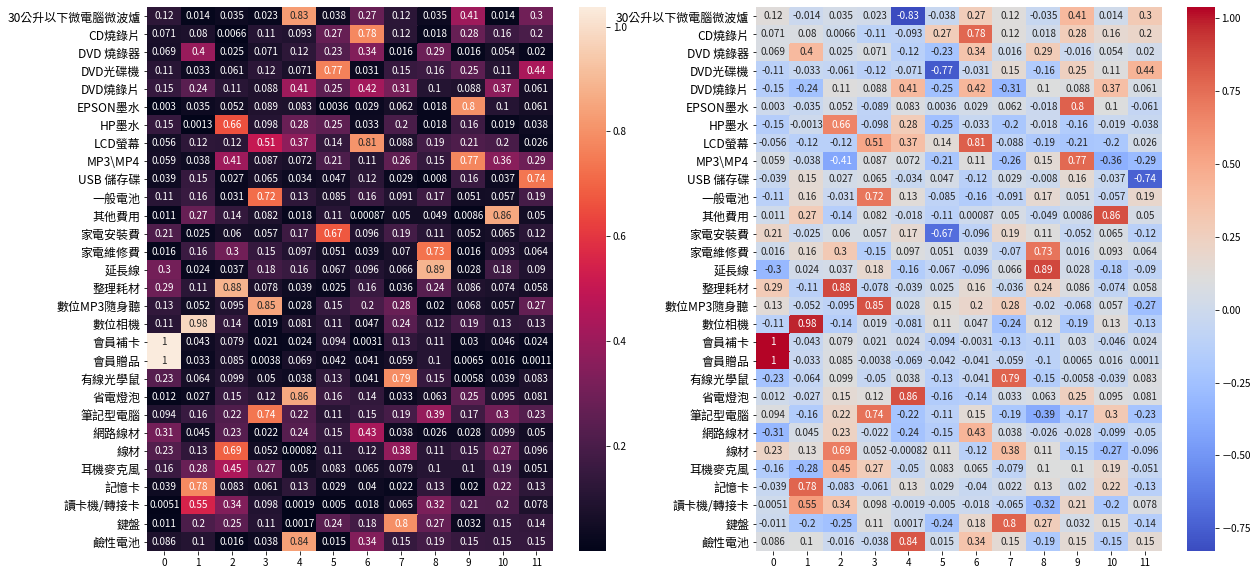

In [91]:
df_fa_viz = pd.DataFrame(rot_loadings_ivc, index=list(purchase_matrix_ivc.columns.droplevel(None)))
df_fa_viz_abs = pd.DataFrame(np.abs(rot_loadings_ivc), index=list(purchase_matrix_ivc.columns.droplevel(None)))

fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(1, 2, 1)
sns.heatmap(df_fa_viz_abs, annot=True, cmap="rocket", ax=ax1)
ax1.yaxis.set_tick_params(labelsize=12)


ax2 = fig.add_subplot(1, 2, 2)
sns.heatmap(df_fa_viz, annot=True, cmap="coolwarm", ax=ax2)
ax2.yaxis.set_tick_params(labelsize=12)

## 消費者分群

### 1. 計算因素分數
因素分數可以幫助行銷人員了解顧客對各購物籃的需求強度：需求越大、對應購物籃的分數越高

In [24]:
fa_score = fa.transform(purchase_matrix)
fa_score = pd.DataFrame(fa_score, index=purchase_matrix.index)
fa_score

,0,1,2,3,4,5,6,7,8,9
ID,,,,,,,,,,
62,0.682142,-0.115827,0.460964,1.005795,1.777418,-1.090807,-0.412775,-0.588258,-1.041601,0.102927
87,-2.123223,1.817000,3.432567,0.332282,-0.718011,-1.458903,0.363023,-0.242512,1.356061,0.950786
92,-2.013408,-0.516126,0.616672,1.274799,0.782202,1.595482,2.571560,-1.088150,0.176407,1.101638
139,1.195534,-0.959189,0.630925,0.514743,0.594465,0.024222,-0.163597,-2.026693,-1.804040,2.269250
198,2.072477,-1.676918,0.523483,-0.981494,0.091807,-1.002173,0.634892,-2.134161,0.786249,1.660597
...,...,...,...,...,...,...,...,...,...,...
8006,-0.558044,1.247931,-0.441024,-0.346170,-0.884014,-0.256107,-0.375481,-0.395189,-0.071341,-1.017784
8059,-0.693541,0.786471,-0.690126,-0.666852,-0.700997,1.055851,-0.593684,-0.273975,-0.607189,-0.684352
8141,-0.866665,1.475150,-0.109153,-0.231514,-0.788282,-1.169347,-0.676785,0.164682,0.175974,-0.847851


#### 所有消費者
* 找出每一個人消費傾向最大的購物籃，並計算所有購物籃獲得「最大消費傾向」的個數。
* 前三名的購物籃是：編號2、編號7、編號6

In [25]:
individual_max_fa_score = fa_score.apply(lambda x: list(x).index(max(x)), axis=1)
individual_max_fa_score.groupby(individual_max_fa_score).count()

0    13
1    39
2    16
3    20
4    16
5    25
6    26
7    20
8    14
9    11
dtype: int64

#### 漸流失消費者
* 找出每一個漸流失顧客的消費傾向最大購物籃，並計算所有購物籃獲得「最大消費傾向」的個數。
* 前三名的購物籃是：編號1、編號4、編號9

In [26]:
ivc_max_fa_score = fa_score.loc[ivc_id, :].apply(lambda x: list(x).index(max(x)), axis=1)
ivc_max_fa_score.groupby(individual_max_fa_score).count()

0    9
1    6
2    6
3    9
4    7
5    3
6    6
7    5
8    8
9    3
dtype: int64

In [92]:
fa_score_ivc = fa.transform(purchase_matrix_ivc)
fa_score_ivc = pd.DataFrame(fa_score_ivc, index=purchase_matrix_ivc.index)
fa_score_ivc

,0,1,2,3,4,5,6,7,8,9,10,11
ID,,,,,,,,,,,,
284,-0.931067,0.238708,-0.078891,0.812276,0.924278,2.172644,1.276505,0.232862,2.136511,2.359411,1.890383,1.280609
332,-0.481129,1.597145,-0.021740,-0.386782,1.895641,2.563296,1.564600,1.225979,2.775899,1.012976,1.170343,1.152519
527,-0.763260,0.214849,-1.271077,1.582541,-0.568158,0.439903,-0.819226,-0.687695,-1.089671,-0.124384,-1.093563,0.247291
539,-0.981459,0.611073,0.136494,0.691594,2.099784,0.282634,-2.082277,1.228308,1.282091,1.211342,1.799426,1.812058
637,-1.372517,1.945914,-1.158940,-0.942105,-0.577077,0.443337,-0.344314,-0.383667,-0.202077,2.118593,-0.422509,-0.708731
...,...,...,...,...,...,...,...,...,...,...,...,...
6449,1.068516,-0.480414,-0.434320,0.754896,-1.093342,0.448632,-0.285267,0.357772,-0.575661,-0.959606,-0.937993,-1.032688
6619,1.681848,-0.972755,1.441236,-0.796640,-0.415624,-0.354945,0.329993,0.956262,-0.732904,-0.928703,-1.087725,-0.411416
6820,-0.621551,-1.012509,-1.299645,-0.597235,-0.669103,-0.322386,-0.744745,-1.123858,-0.521410,-0.281810,-0.373324,1.271618


In [93]:
individual_max_fa_score_ivc = fa_score_ivc.apply(lambda x: list(x).index(max(x)), axis=1)
individual_max_fa_score_ivc.groupby(individual_max_fa_score_ivc).count()

0     14
1      4
2      3
3      3
4      5
5      5
6      5
7      1
8      5
9      4
10     7
11     6
dtype: int64

### 2. 集群分析

In [27]:
from sklearn.cluster import AgglomerativeClustering, KMeans

# Ward Method
# agglo_clusters = AgglomerativeClustering(n_clusters=5, linkage="ward").fit(fa_score)
# pd.DataFrame({'label':agglo_clusters.labels_}, index=purchase_matrix.index).groupby('label')['label'].count()

In [28]:
good_init = np.array([[ 1.01219463, -0.82716759,  0.23406838,  0.18124711,  0.88845558,
        -0.23956035, -0.36962617, -0.26166458, -0.12905706,  0.90195405],
       [-0.39557344,  0.89528203, -0.12761694, -0.02788751, -0.51150922,
        -0.73075561, -0.4567193 ,  0.60304648,  0.05450269, -0.53618847],
       [-0.45091696,  0.20481013, -0.4436964 , -0.41875756, -0.35885652,
         0.53488823, -0.25840355, -0.15348873, -0.39626189, -0.49807011],
       [-0.10871846, -0.96101984, -0.15075234,  0.02975947,  0.42572198,
         0.99072683,  1.5049414 , -1.09465225,  0.82532108,  0.52514663],
       [ 0.48724977, -0.24663264,  1.52267202,  1.20149356,  0.26423514,
        -0.64728354,  1.58631079,  0.61694988,  1.01350878,  0.72773654]])

In [29]:
# K-means clustering
k_means_clusters = KMeans(n_clusters=5, n_init=1, init=good_init).fit(fa_score)
pd.DataFrame({'label':k_means_clusters.labels_}, index=purchase_matrix.index).groupby('label')['label'].count()

label
0    43
1    44
2    77
3    15
4    21
Name: label, dtype: int64

最後我們要把集群結果加入原始資料中。

In [30]:
clusters = k_means_clusters

customers_temp = customers.copy()
customers_temp['Cluster'] = clusters.labels_
customers_temp.head()

,客戶ID,Gender,Age,Zipcode,Area,AgeLevel,Cluster
0,3596,男,37,247,北區,35-44歲,0
1,1729,女,29,112,北區,25-34歲,4
2,2036,男,30,237,北區,25-34歲,3
3,1686,男,34,234,北區,25-34歲,0
4,5943,女,48,802,南區,45-54歲,0


檢視每個分群對購物籃的消費傾向。因為每個分群裡面包含許多顧客，以分群的中心作為每個群集的代表點。

In [31]:
pd.DataFrame(clusters.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9
0,1.012195,-0.827168,0.234068,0.181247,0.888456,-0.239560,-0.369626,-0.261665,-0.129057,0.901954
1,-0.395573,0.895282,-0.127617,-0.027888,-0.511509,-0.730756,-0.456719,0.603046,0.054503,-0.536188
2,-0.450917,0.204810,-0.443696,-0.418758,-0.358857,0.534888,-0.258404,-0.153489,-0.396262,-0.498070
3,-0.108718,-0.961020,-0.150752,0.029759,0.425722,0.990727,1.504941,-1.094652,0.825321,0.525147
4,0.487250,-0.246633,1.522672,1.201494,0.264235,-0.647284,1.586311,0.616950,1.013509,0.727737


### 集群後ARFM分析
為了跟將ARFM維度與集群結果合併比較，我們必須先將RFM資料讀入，再將其與集群欄位合併

In [47]:
rfm_data = pd.read_csv("_rfm_data.csv", index_col=0)
rfm_data.head()

,客戶ID,Gender,Age,Zipcode,Area,FirstPurchase,NPurchase,Reccency,Frequency,MonetaryValue,TotalAmount,CAI,Active,LowReccency,HighFrequency,HighMonetaryValue,ActivenessCategory
0,3596,男,37,247,北區,2006-03-21,28,7,13,6922.076923,89987,0.323937,True,True,True,True,Top 20%
1,1729,女,29,112,北區,2006-04-19,4,155,3,6416.666667,19250,0.329051,True,False,False,True,Top 20%
2,2036,男,30,237,北區,2006-07-29,4,327,4,1082.250000,4329,-0.141753,False,False,False,False,Bottom 20%
3,1686,男,34,234,北區,2006-01-26,172,3,78,6419.870130,494330,0.375476,True,True,True,True,Top 20%
4,5943,女,48,802,南區,2006-12-24,12,43,7,6005.714286,42040,-0.387013,False,True,True,True,Bottom 20%


In [48]:
rfm_data = rfm_data.merge(customers_temp[['客戶ID','AgeLevel','Cluster']], on='客戶ID')
rfm_data.head()

,客戶ID,Gender,Age,Zipcode,Area,FirstPurchase,NPurchase,Reccency,Frequency,MonetaryValue,TotalAmount,CAI,Active,LowReccency,HighFrequency,HighMonetaryValue,ActivenessCategory,AgeLevel,Cluster
0,3596,男,37,247,北區,2006-03-21,28,7,13,6922.076923,89987,0.323937,True,True,True,True,Top 20%,35-44歲,0
1,1729,女,29,112,北區,2006-04-19,4,155,3,6416.666667,19250,0.329051,True,False,False,True,Top 20%,25-34歲,4
2,2036,男,30,237,北區,2006-07-29,4,327,4,1082.250000,4329,-0.141753,False,False,False,False,Bottom 20%,25-34歲,3
3,1686,男,34,234,北區,2006-01-26,172,3,78,6419.870130,494330,0.375476,True,True,True,True,Top 20%,25-34歲,0
4,5943,女,48,802,南區,2006-12-24,12,43,7,6005.714286,42040,-0.387013,False,True,True,True,Bottom 20%,45-54歲,0


In [49]:
with pd.option_context('display.max_rows', 1000, 'display.precision', 3):
    display(rfm_data[["Reccency", "Frequency", "MonetaryValue", "TotalAmount", "CAI", "Cluster"]].groupby('Cluster').describe().T)

Cluster                       0           1           2           3          4
Reccency      count      42.000      44.000      77.000      14.000     21.000
              mean       80.238      85.000      78.948      68.929    123.714
              std       101.660      89.117      79.860      84.128     69.602
              min         1.000       2.000       1.000       6.000     21.000
              25%        22.250      22.000      22.000      25.250     43.000
              50%        47.000      44.000      44.000      44.500    150.000
              75%        83.250     169.250     112.000      58.750    171.000
              max       514.000     371.000     339.000     327.000    253.000
Frequency     count      42.000      44.000      77.000      14.000     21.000
              mean       11.429       7.568       8.961      13.500      5.762
              std        14.127       7.975      10.276      18.883      4.146
              min         1.000       1.000       1.000       1.000      1.000
              25%         4.000       2.000       3.000       4.250      3.000
              50%         6.500       3.000       6.000       9.000      4.000
              75%        12.750      12.000      11.000      11.750      8.000
              max        78.000      39.000      75.000      73.000     16.000
MonetaryValue count      42.000      44.000      77.000      14.000     21.000
              mean     2351.734    2293.636    2455.157    2317.227   2781.005
              std      2231.302    1935.360    2277.391    1642.210   3354.534
              min       270.833     275.667      87.000     495.545    320.000
              25%       876.604     894.778     961.947    1201.898   1109.750
              50%      1562.900    2043.002    1799.000    1787.232   1513.875
              75%      3229.083    3112.625    3034.000    2992.450   3053.833
              max     10812.333    8880.500   11730.000    6955.667  14754.500
TotalAmount   count      42.000      44.000      77.000      14.000     21.000
              mean    36575.619   19863.114   23315.545   23598.357  14862.952
              std     82863.683   34455.734   50084.273   31080.505  15682.037
              min       400.000     400.000     174.000    2641.000    320.000
              25%      2854.250    2725.250    3818.000    5785.500   4439.000
              50%      8735.000    7723.500   12850.000   13362.500  11327.000
              75%     28723.250   25575.250   26000.000   23970.250  18323.000
              max    494330.000  209317.000  424905.000  115993.000  54743.000
CAI           count      38.000      38.000      67.000      12.000     17.000
              mean        0.075       0.030      -0.006      -0.028      0.132
              std         0.239       0.140       0.172       0.200      0.188
              min        -0.481      -0.270      -0.326      -0.277     -0.209
              25%        -0.126      -0.040      -0.116      -0.147      0.071
              50%         0.011       0.000       0.000      -0.097      0.147
              75%         0.307       0.070       0.115       0.013      0.244
              max         0.540       0.358       0.376       0.387      0.448

In [50]:
from scipy.stats import f_oneway

def f_test(data, variable, groupby='Cluster', log_value=False):
    f_data = []
    for _, idx in data.groupby(groupby).groups.items():
        section = (data.loc[idx, :])[variable].dropna()
        
        if log_value == True:
            section = np.log(section)
        
        section = list(section)
        f_data.append(section)
    return f_oneway(*f_data)

In [51]:
for var in ["Reccency", "Frequency", "MonetaryValue", "TotalAmount", "CAI"]:
    if var != 'CAI':
        print(var, ':', f_test(data=rfm_data, variable=var, log_value=True))
    else:
        print(var, ':', f_test(data=rfm_data, variable=var, log_value=False))


Reccency : F_onewayResult(statistic=2.132304662625693, pvalue=0.07832079976306769)
Frequency : F_onewayResult(statistic=1.3695952663065125, pvalue=0.24595846734396193)
MonetaryValue : F_onewayResult(statistic=0.11294205788974489, pvalue=0.9778605108553821)
TotalAmount : F_onewayResult(statistic=0.6620563093426206, pvalue=0.6190843286509399)
CAI : F_onewayResult(statistic=2.754622841701269, pvalue=0.029726931748169757)


### 3. 卡方分析
卡方分析(chi2 independency test) 可以用來檢定二個類別變量的關聯程度。放在消費者集群的脈絡下來看，我們可以藉此觀察各分群間是否在人口統計便量上有所差異。

In [52]:
from scipy.stats import chi2_contingency

先透過樞紐分析表功能建立列聯表，在接著利用`chi2_contingency`計算卡方統計量和對應的p-value

因為kmeans clustering 有一定隨機性，所以我不斷嘗試直到找到顯著的分群為止，前面的`good_init`就是重現這個分群結果的預設值。

表格中間呈現的是條件機率，最底列呈現則是該集群的邊際機率

In [53]:
categorical_var_list = ['Gender', 'AgeLevel', 'Area']

display(pd.pivot_table(customers_temp, columns='Cluster', values='客戶ID', aggfunc='count', fill_value=0))
print("\n")

for var in categorical_var_list:
    
    # 製作列聯表
    pivot_tab_temp = pd.pivot_table(customers_temp, columns='Cluster', index=var,
                                    values='客戶ID', aggfunc='count', fill_value=0)
    
    # 卡方檢定
    chi2, p_value, _, _ = chi2_contingency(pivot_tab_temp)
    
    # 製作呈現用的表格
    pivot_tab_temp = pd.pivot_table(customers_temp, columns='Cluster', index=var,
                                    values='客戶ID', aggfunc='count', fill_value=0,
                                    margins=True)
    
    # 製作機率分配表格
    dist = {}
    for id, row in pivot_tab_temp.iterrows():
        dist[id] = row/row.iloc[-1]
    pivot_tab_dist = pd.DataFrame(dist).T
    
    with pd.option_context('display.precision', 3):
        print("----------")
        print(var, "  (Chi2, p_value) = ({:.3f}, {:.3f})".format(chi2, p_value))
        display(pivot_tab_dist)
        print("\n")


Cluster,0,1,2,3,4
客戶ID,43,44,77,15,21




----------
Gender   (Chi2, p_value) = (10.996, 0.027)


Cluster,0,1,2,3,4,All
女,0.192,0.256,0.333,0.038,0.179,1.0
男,0.230,0.197,0.418,0.098,0.057,1.0
All,0.215,0.220,0.385,0.075,0.105,1.0




----------
AgeLevel   (Chi2, p_value) = (16.303, 0.698)


Cluster,0,1,2,3,4,All
25-34歲,0.220,0.220,0.320,0.140,0.100,1.0
35-44歲,0.167,0.222,0.417,0.042,0.153,1.0
45-54歲,0.205,0.256,0.410,0.051,0.077,1.0
55-64歲,0.231,0.154,0.462,0.077,0.077,1.0
65歲以上,0.500,0.250,0.125,0.125,0.000,1.0
未滿25歲,0.400,0.200,0.400,0.000,0.000,1.0
All,0.215,0.220,0.385,0.075,0.105,1.0




----------
Area   (Chi2, p_value) = (22.130, 0.139)


Cluster,0,1,2,3,4,All
中區,0.282,0.308,0.256,0.051,0.103,1.0
北區,0.175,0.223,0.427,0.058,0.117,1.0
南區,0.260,0.160,0.380,0.100,0.100,1.0
外島地區,0.000,0.000,0.000,1.000,0.000,1.0
東區,0.143,0.143,0.571,0.143,0.000,1.0
All,0.215,0.220,0.385,0.075,0.105,1.0


In [ ]:
pd.pivot_table(customers_temp, columns='clu', values='客戶ID', aggfunc='count', fill_value=0)

In [ ]:
customers_temp[customers_temp["客戶ID"].isin(ivc_id)].groupby('clu')['客戶ID'].count()/pd.pivot_table(customers_temp, columns='clu', values='客戶ID', aggfunc='count', fill_value=0)

### 4.變異數分析

In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

def anova(data, variable, profit_index, alpha):
    print(f"{variable} - {profit_index}\n")

    for clu in range(5):
        temp_data = data.groupby('Cluster').get_group(clu)
        mc = MultiComparison(temp_data[profit_index], temp_data[variable])
        tkresult = mc.tukeyhsd(alpha)
        print("cluster =", clu+1, "\n")
        print(tkresult)
        print("\n")

In [58]:
rfm_data['LogMonetaryValue'] = np.log(rfm_data.MonetaryValue)

#### 性別

In [64]:
profit_index = 'LogMonetaryValue'
variable = 'Gender'

anova(rfm_data, variable, profit_index, alpha=0.3)

Gender - LogMonetaryValue

cluster = 1 

Multiple Comparison of Means - Tukey HSD, FWER=0.30
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     女      男  -0.0727 0.8169 -0.3886 0.2432  False
---------------------------------------------------


cluster = 2 

Multiple Comparison of Means - Tukey HSD, FWER=0.30
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     女      男  -0.0015   0.9 -0.2844 0.2815  False
--------------------------------------------------


cluster = 3 

Multiple Comparison of Means - Tukey HSD, FWER=0.30
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     女      男    -0.11 0.6271 -0.3384 0.1185  False
---------------------------------------------------


cluster = 4 

Multiple Comparison of Means - Tukey HSD, FWER=0.30
group1 group2 meandiff p-adj   lower  upper  reject
-------------------------------

年齡

In [65]:
profit_index = 'LogMonetaryValue'
variable = 'AgeLevel'

anova(rfm_data, variable, profit_index, alpha=0.3)

AgeLevel - LogMonetaryValue

cluster = 1 

Multiple Comparison of Means - Tukey HSD, FWER=0.30
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
25-34歲 35-44歲  -0.1078    0.9 -0.9445  0.729  False
25-34歲 45-54歲  -0.1295    0.9 -1.0987 0.8398  False
25-34歲 55-64歲  -0.2535    0.9 -1.2709 0.7639  False
25-34歲  65歲以上  -0.7093 0.7658 -1.8798 0.4611  False
25-34歲  未滿25歲  -0.3804    0.9 -1.9213 1.1605  False
35-44歲 45-54歲  -0.0217    0.9 -0.9751 0.9317  False
35-44歲 55-64歲  -0.1457    0.9  -1.148 0.8566  False
35-44歲  65歲以上  -0.6016 0.8673 -1.7589 0.5558  False
35-44歲  未滿25歲  -0.2726    0.9 -1.8037 1.2584  False
45-54歲 55-64歲  -0.1241    0.9 -1.2393 0.9912  False
45-54歲  65歲以上  -0.5799    0.9 -1.8363 0.6766  False
45-54歲  未滿25歲   -0.251    0.9 -1.8582 1.3563  False
55-64歲  65歲以上  -0.4558    0.9 -1.7498 0.8381  False
55-64歲  未滿25歲  -0.1269    0.9 -1.7636 1.5098  False
 65歲以上  未滿25歲   0.3289    0.9 -1.4071  2.065  False
---------------------

地區

In [66]:
profit_index = 'LogMonetaryValue'
variable = 'Area'

anova(rfm_data, variable, profit_index, alpha=0.3)

Area - LogMonetaryValue

cluster = 1 

Multiple Comparison of Means - Tukey HSD, FWER=0.30
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    中區     北區   1.1311 0.0038   0.585 1.6771   True
    中區     南區   0.8324 0.0669  0.2542 1.4105   True
    中區     東區   1.8161 0.1444  0.3422   3.29   True
    北區     南區  -0.2987 0.7158 -0.8187 0.2212  False
    北區     東區    0.685 0.8167  -0.767 2.1371  False
    南區     東區   0.9838 0.6203 -0.4807 2.4482  False
---------------------------------------------------


cluster = 2 

Multiple Comparison of Means - Tukey HSD, FWER=0.30
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    中區     北區   0.3921 0.5722 -0.1516 0.9359  False
    中區     南區  -0.1765    0.9 -0.8735 0.5205  False
    中區     東區   -0.975 0.6779 -2.5644 0.6144  False
    北區     南區  -0.5686 0.3852 -1.1954 0.0581  False
    北區     東區  -1.3671  0.416  -2.927 0.1927  False
    南區   

### 5. 漸流失客戶與集群分析結果

In [67]:
customers_temp[customers_temp["客戶ID"].isin(ivc_id)].groupby('Cluster')['客戶ID'].count()

Cluster
0    11
1    11
2    31
3     7
4     2
Name: 客戶ID, dtype: int64

In [68]:
customers_temp[customers_temp["客戶ID"].isin(ivc_id)].groupby('Cluster')['客戶ID'].count()/62

Cluster
0    0.177419
1    0.177419
2    0.500000
3    0.112903
4    0.032258
Name: 客戶ID, dtype: float64

In [69]:
pd.DataFrame({'label':k_means_clusters.labels_}, index=purchase_matrix.index).groupby('label')['label'].count()

label
0    43
1    44
2    77
3    15
4    21
Name: label, dtype: int64